# Credit card fraud 
The aim of this project is to predict, given the dataset, whether a credit card transaction is fraudulent or not.

This project is composed of several parts:
1. General information about the dataset and its features
2. Problem definition and tools
3. Exploratory Data Analysis (EDA)
4. Modelling
5. Hyperparameter tuning
6. Making predictions
7. Evaluation metrics
8. Feature importance

# 1. General information about the dataset and its features

The dataset was taken from the "Credit Card Fraud Detection Dataset 2023" in Kaggle: https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023. Although this dataset can be used for other types of problems, such as predicting which merchant categories are associated with fraud or transactions are more prone to fraud, this project will be concerned with predicting how likely is for a transaction to be fraudulent.

The dataset contains credit card transactions made by European cardholders in the year 2023. It comprises over 550,000 records, and the data has been anonymized to protect the cardholders' identities. The primary objective of this dataset is to facilitate the development of fraud detection algorithms and models to identify potentially fraudulent transactions.

The dataset is in a .csv format and has these features:

id: unique identifier for each transaction

V1-V28: anonymized features for various transaction attributes (such as time or location)

Amount: The transaction amount

Class: Binary label (0-1) that denotes whether a transaction is fraudulent (1) or not
(0)

# 2. Problem definition and tools
This problem by nature is a multi-class classification problem, since we have to predict a label based on multiple classes. The platform used will be Pandas (for data analysis and manipulation), numpy (for number related arrays and operations), matplotlib and seaborn (for visualization) and scikit-learn (for modelling, tuning, evaluating and experimenting).

# 3. EDA

In [1]:
# Importing pandas
import pandas as pd

In [2]:
# Creating a dataframe for the credit card dataset
df = pd.read_csv("creditcard.csv")

In [3]:
# Checking the top 5 rows
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [4]:
# Checking the shape of the dataset
df.shape

(568630, 31)

In [5]:
# Checking for missing values, and if there are any, to drop or fill them
df.isna().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# More information on the dataframe columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [7]:
# Descriptive statistics generation
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [8]:
# Checking how many 0 and 1 labels are in Class
df.Class.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

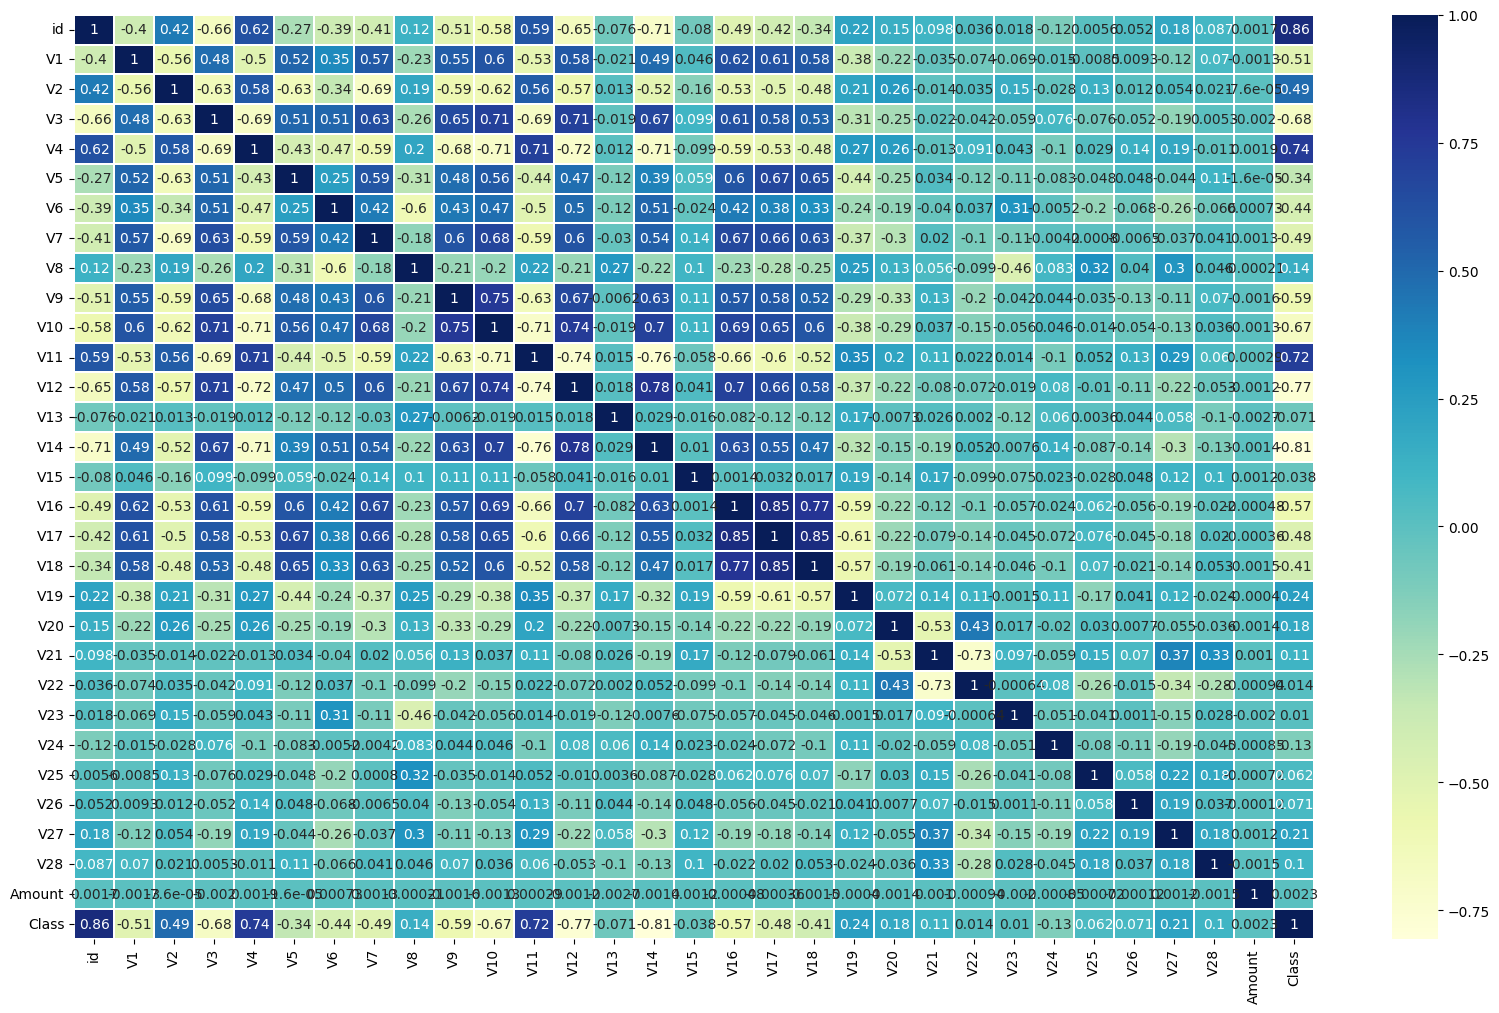

In [9]:
# Import matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix
correlation_matrix = df.corr()
fig,ax = plt.subplots(figsize = (20,12))
ax = sns.heatmap(correlation_matrix, annot = True, linewidths = 0.1, cmap = "YlGnBu")

So it is apparent that the dataset is perfectly balanced, it has no missing values, and most importantly, it is all in a numeric form.

# 4. Modelling
As noted above, scikit-learn will be used for modelling. The models used as part of experimentation process will be RandomForestClassifier, LogisticRegression and LinearSVC.

In [10]:
# Data splitting into a training and test set
X = df.drop("Class", axis = 1)
y = df.Class

# Shape of X and y
X.shape, y.shape

((568630, 30), (568630,))

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [12]:
# Importing the models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [13]:
# Importing NumPy
import numpy as np

# Model dictionary
models = {"RandomForestClassifier": RandomForestClassifier(),
          "LogisticRegression": LogisticRegression(max_iter = 200),
          "LinearSVC": LinearSVC(dual = "auto")}

# Function to fit and score the 3 models simultaneously
def fit_score(models, X_train, X_test, y_train, y_test):
    # Random seed
    np.random.seed(42)
    scores = {}
    """
    Takes as input a dictionary of models, and split datasets, and returns a dictionary with the appropriate scores.
    """
    for name, model in models.items():
        model.fit(X_train, y_train)
        scores[name] = model.score(X_test, y_test)

    return scores

In [14]:
# Calling the function
score = fit_score(models, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)
score

{'RandomForestClassifier': 0.9998329317834093,
 'LogisticRegression': 0.7908217997643459,
 'LinearSVC': 0.7909185234686879}

It's fairly obvious that RandomForestClassifier has the highest accuracy by far. Here is a quick plot to illustrate it:

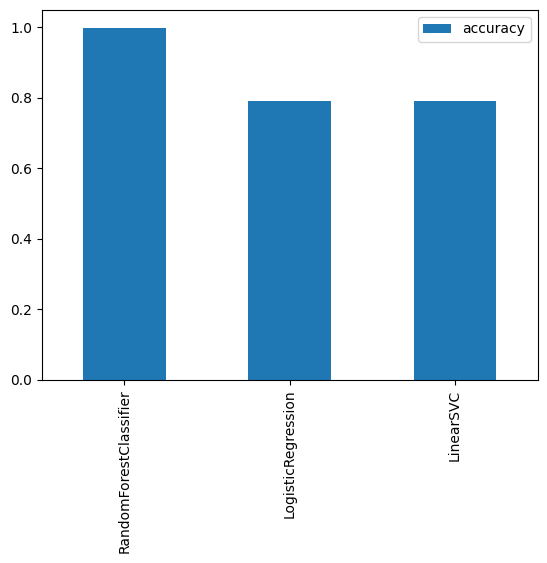

In [15]:
comparison = pd.DataFrame(score, index = ["accuracy"])
comparison.T.plot.bar();

# 5. Hyperparameter tuning
This step is crucial in improving models.

In [16]:
# Parameter grid for RandomForestClassifier
rf_grid = {"max_samples": [10000],
           "n_estimators": np.arange(10,100,10),
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,10,1)}

# Parameter grid for LogisticRegression
lr_grid = {"C":  np.logspace(-4,4,20),
           "solver": ["liblinear"]}

# Parameter grid for LinearSVC
svc_grid = {"C":  np.logspace(-4,4,20),
            "max_iter": np.arange(1,10000,100),
            "dual": ["auto"]}

In [ ]:
# Importing RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Model tuning
tuned_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions = rf_grid, cv = 5, n_iter = 15, verbose = 1)
tuned_lr = RandomizedSearchCV(LogisticRegression(), param_distributions = lr_grid, cv = 5, n_iter = 30, verbose = 1)
tuned_svc = RandomizedSearchCV(LinearSVC(), param_distributions = svc_grid, cv = 5, n_iter = 15, verbose = 1)

# Model fitting
tuned_rf.fit(X_train, y_train)
tuned_lr.fit(X_train, y_train)
tuned_svc.fit(X_train, y_train)

A test is conducted with the best parameters below to see if there is any improvement.

In [18]:
tuned_rf.best_params_

{'n_estimators': 70,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_samples': 10000}

In [19]:
clf = RandomForestClassifier(n_estimators = 70, min_samples_split = 8, min_samples_leaf = 2, max_samples = 10000)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9997362080790673

In [20]:
tuned_lr.best_params_

{'solver': 'liblinear', 'C': 0.0001}

In [21]:
logreg = LogisticRegression(solver = "liblinear", C = 0.0001)
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.7908217997643459

In [22]:
tuned_svc.best_params_

{'max_iter': 901, 'dual': 'auto', 'C': 545.5594781168514}

In [23]:
svc = LinearSVC(max_iter = 5501, dual = "auto", C = 4.281332398719396)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.7909185234686879

After tuning and retesting with the best parameters, RandomForestClassifier still has the highest score.

# 6. Making predictions
We will focus on RandomForestClassifier from now on, since the other models did not score quite as well.

In [24]:
# Standard prediction
y_preds = clf.predict(X_test)

In [25]:
y_preds

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [26]:
# Probability prediction
y_prob_preds = clf.predict_proba(X_test)

In [27]:
y_prob_preds

array([[1.        , 0.        ],
       [0.01632653, 0.98367347],
       [1.        , 0.        ],
       ...,
       [1.        , 0.        ],
       [0.99285714, 0.00714286],
       [0.        , 1.        ]])

Seems like clf is quite accurate.

# 7. Evaluation metrics
To check the quality of these predictions and to more correctly assess the accuracy of clf, various other evaluation metrics will be used.

In [28]:
# Importing the metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score

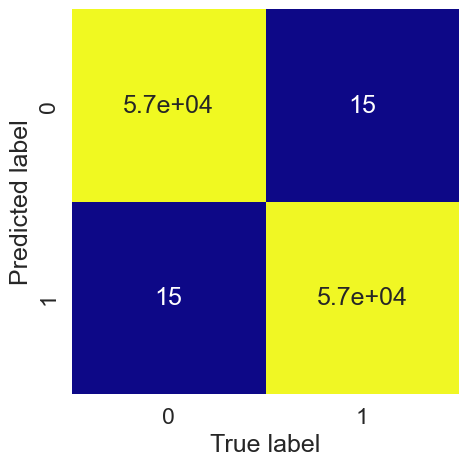

In [29]:
# Confusion matrix
cm = confusion_matrix(y_test, y_preds)
sns.set(font_scale = 1.5)

def plot_matrix(y_test, y_preds):
    fig, ax = plt.subplots(figsize = (5,5))
    ax = sns.heatmap(cm, cmap = "plasma", annot = True, cbar = False);
    ax.set(xlabel = "True label", ylabel = "Predicted label")

plot_matrix(y_test, y_preds)

In [30]:
# Classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57068
           1       1.00      1.00      1.00     56658

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [31]:
# AUC score
roc_auc_score(y_test, y_preds)

0.9997362046504791

In [32]:
# Cross-validated score by mean
np.mean(cross_val_score(clf, X, y, scoring = "accuracy", cv = 5))

0.9085855477199585

It can be fairly concluded that clf scores quite well on most evaluation metrics with at least 90% accuracy, and it can predict whether a transaction is fraudulent or not, right almost every time. 

# 8. Feature importance
Here we will take a look at which features have been more important in training and testing.

In [33]:
# Feature importances
importances = clf.feature_importances_

In [34]:
# Importances DataFrame
clf_importances = pd.DataFrame(importances, index = X.columns)

In [35]:
# Checking the importance DataFrame
clf_importances

,0
id,0.349842
V1,0.002057
V2,0.008100
V3,0.013719
V4,0.087334
V5,0.002214
V6,0.005900
V7,0.021696
V8,0.003288
V9,0.009447


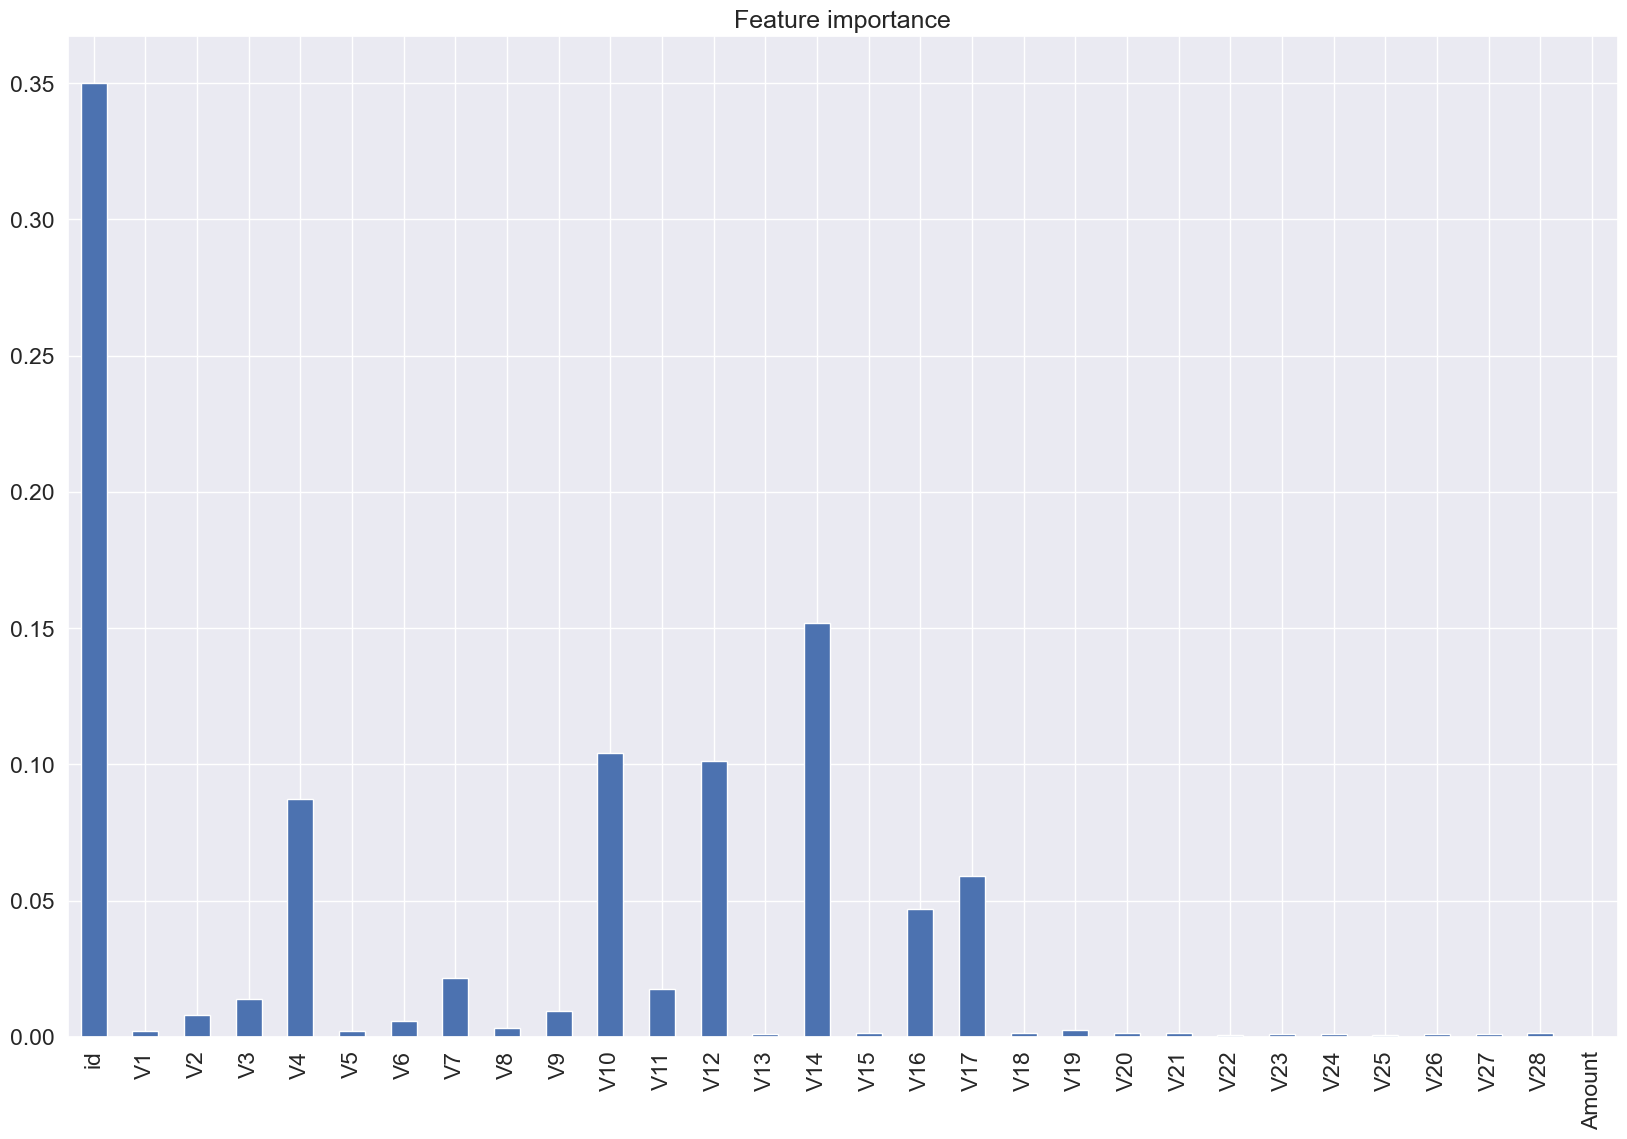

In [36]:
# Plotting 
clf_importances.plot.bar(title = "Feature importance", legend = False, figsize = (20,13));

A simple observation notes that id and V14 have played the biggest role in the fraudulence of a transaction.